In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

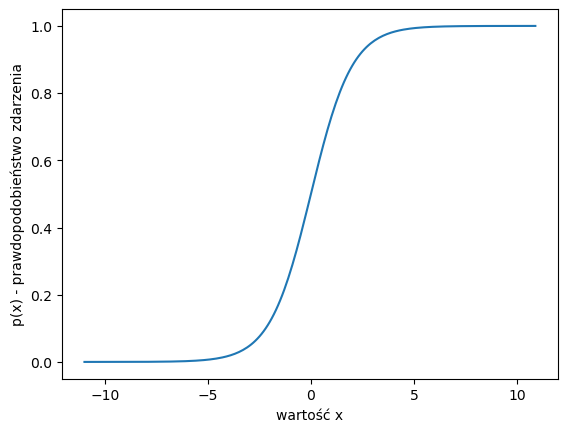

In [15]:
# Plotting the Sigmoid Function in Python with Matplotlib
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

values = np.arange(-11, 11, 0.1)

plt.plot(values, sigmoid(values))
plt.xlabel('wartość x')
plt.ylabel('p(x) - prawdopodobieństwo zdarzenia')
plt.show()

In [2]:
def logistic(z):
    return 1 / (1 + np.exp(-z))
# True theta coefficients.
theta = np.array([[4], [-2]])
# Number of features.
p = len(theta)

# Number of training data points.
n = 200
# Generate feature values from U[0,1].
np.random.seed(1)
X = np.random.rand(n, p)

# Calculate logits.
z = np.dot(X, theta)
# Calculate probabilities.
prob = logistic(z)


# Generate labels by sampling from Bernoulli(prob)
y = np.random.binomial(1, prob.flatten())



In [3]:
X

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01],
       [1.46755891e-01, 9.23385948e-02],
       [1.86260211e-01, 3.45560727e-01],
       [3.96767474e-01, 5.38816734e-01],
       [4.19194514e-01, 6.85219500e-01],
       [2.04452250e-01, 8.78117436e-01],
       [2.73875932e-02, 6.70467510e-01],
       [4.17304802e-01, 5.58689828e-01],
       [1.40386939e-01, 1.98101489e-01],
       [8.00744569e-01, 9.68261576e-01],
       [3.13424178e-01, 6.92322616e-01],
       [8.76389152e-01, 8.94606664e-01],
       [8.50442114e-02, 3.90547832e-02],
       [1.69830420e-01, 8.78142503e-01],
       [9.83468338e-02, 4.21107625e-01],
       [9.57889530e-01, 5.33165285e-01],
       [6.91877114e-01, 3.15515631e-01],
       [6.86500928e-01, 8.34625672e-01],
       [1.82882773e-02, 7.50144315e-01],
       [9.88861089e-01, 7.48165654e-01],
       [2.80443992e-01, 7.89279328e-01],
       [1.03226007e-01, 4.47893526e-01],
       [9.08595503e-01, 2.93614148e-01],
       [2.877753

In [7]:


#plot logistic regression curve
sns.regplot(x=X[:,2], y=y, logistic=True, ci=None,
                       scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})
plt.ylabel('prawdopodobieństwo')
plt.xlabel('')

IndexError: index 2 is out of bounds for axis 1 with size 2



The x-axis shows the values of the predictor variable “balance” and the y-axis displays the predicted probability of defaulting.

We can clearly see that higher values of balance are associated with higher probabilities that an individual defaults.

In [2]:
df = pd.read_csv('heart_attack.csv', na_values='?')

In [3]:
df = df.rename(columns={'num       ': 'target'})

df['target'].value_counts(dropna=False)

0    188
1    106
Name: target, dtype: int64

In [4]:
min(df.age)

28

In [5]:
df = df.drop(['slope', 'ca', 'thal'], axis=1)

df = df.dropna().copy()

In [6]:
df['cp'].value_counts(dropna=False)

df['restecg'].value_counts(dropna=False)

0.0    208
1.0     47
2.0      6
Name: restecg, dtype: int64

In [7]:
df = pd.get_dummies(df, columns=['cp', 'restecg'], drop_first=True)

df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,1,0,0,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,1,0,1,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,1,0,0,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,1,0,0,0,0


In [8]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'target'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['cp_2', 'cp_3', 'cp_4', 'exang', 'fbs', 'restecg_1.0', 'restecg_2.0', 'sex']


In [9]:
random_seed = 888
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['target'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(208, 14)
(53, 14)

0    0.625
1    0.375
Name: target, dtype: float64

0    0.622642
1    0.377358
Name: target, dtype: float64


In [10]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

In [11]:
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

LogisticRegression(penalty='none')

In [12]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


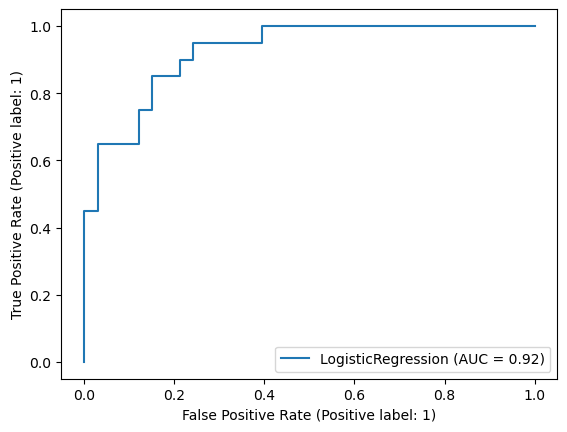

In [13]:
plot_roc_curve(clf, X_test, y_test)

In [14]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [15]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.35613
AUC = 0.92424
Average Precision = 0.89045

Using 0.5 as threshold:
Accuracy = 0.83019
Precision = 0.76190
Recall = 0.80000
F1 score = 0.78049

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.76      0.80      0.78        20

    accuracy                           0.83        53
   macro avg       0.82      0.82      0.82        53
weighted avg       0.83      0.83      0.83        53



Confusion Matrix


C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


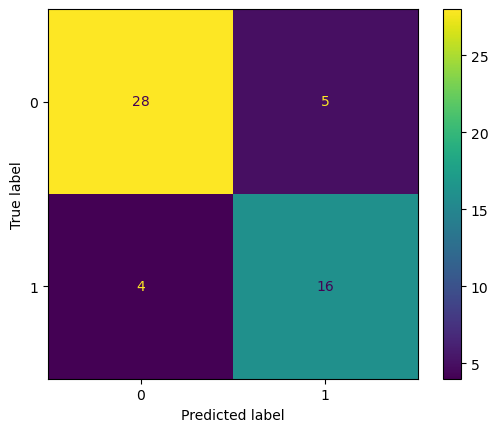

In [16]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

he ten features we’ll be using are:

    age: age in years
    sex: sex (1 = male; 0 = female)
    cp: chest pain type
    – 1: typical angina
    – 2: atypical angina
    – 3: non-anginal pain
    – 4: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholesterol in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results
    – 0: normal
    – 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    – 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    thalach: maximum heart rate achieved
    exang: exercise-induced angina (1 = yes; 0 = no)
    oldpeak: ST depression induced by exercise relative to rest

We can also take a quick look at the data itself by printing out the dataset.

In [19]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients, 'exp_coef':np.exp(coefficients)})

,variable,coefficient,exp_coef
0,intercept,-0.178340,0.836658
1,cp_2,-2.895253,0.055285
2,cp_3,-1.808676,0.163871
3,cp_4,-0.830942,0.435639
4,exang,0.514580,1.672935
5,fbs,1.514143,4.545525
6,restecg_1.0,-0.638990,0.527825
7,restecg_2.0,-0.429625,0.650753
8,sex,1.290292,3.633847
9,age,0.059633,1.061447


<AxesSubplot: xlabel='trestbps', ylabel='target'>

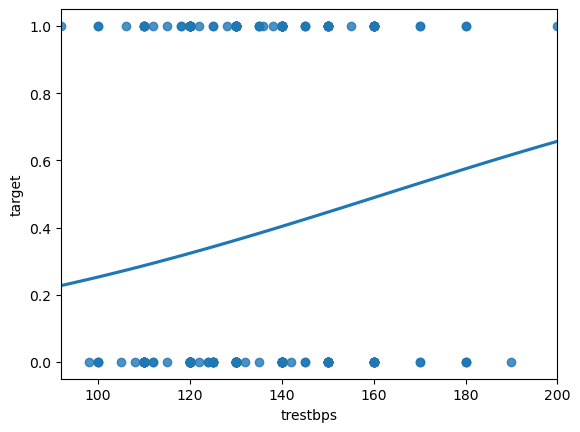

In [18]:
#define the predictor variable and the response variable
x = df['trestbps']
y = df['target']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

explained variance ratio (first two components): [0.92461872 0.05306648]


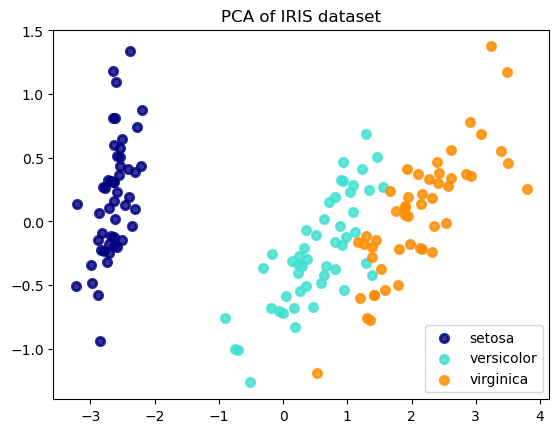

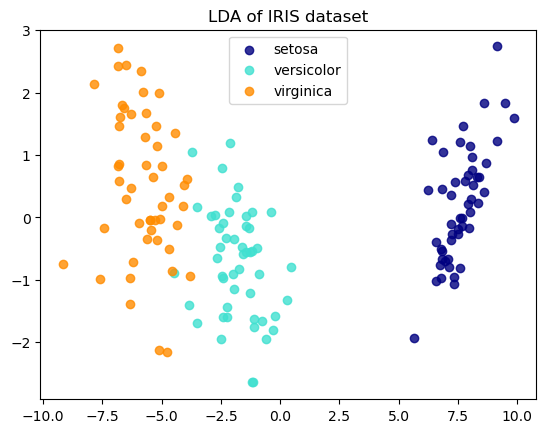

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

In [4]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [5]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [7]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [8]:
pca.singular_values_

array([25.09996044,  6.01314738])

In [9]:
pca.feature_names_in_

AttributeError: 'PCA' object has no attribute 'feature_names_in_'

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
##import graphviz
from sklearn import tree

In [14]:
import pandas as pd

In [19]:
df = pd.read_csv("Heart.csv",index_col =0)

In [21]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [22]:
len(df)

303

In [28]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

,AHD
1,No
2,Yes
3,Yes
4,No
5,No
...,...
299,Yes
300,Yes
301,Yes
302,Yes


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ValueError: could not convert string to float: 'asymptomatic'

ValueError: x and y must have same first dimension, but have shapes (11,) and (12,)

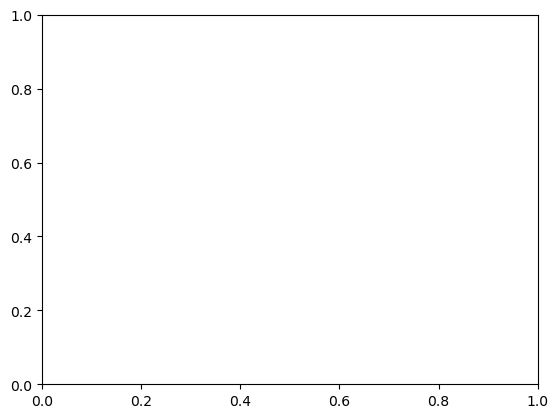

In [30]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [46]:
X, y = load_breast_cancer(return_X_y=True)

In [61]:
features = load_breast_cancer()

In [63]:
features.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [39]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


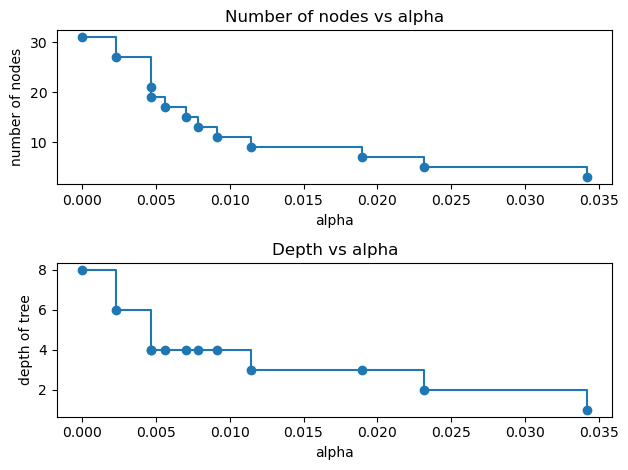

In [40]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

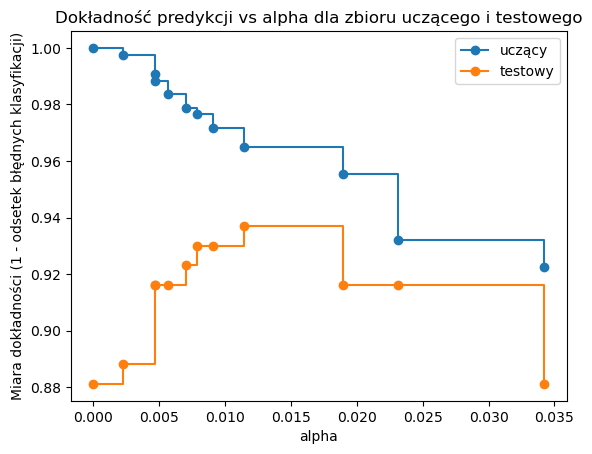

In [45]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Miara dokładności (1 - odsetek błędnych klasyfikacji)")
ax.set_title("Dokładność predykcji vs alpha dla zbioru uczącego i testowego")
ax.plot(ccp_alphas, train_scores, marker="o", label="uczący", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="testowy", drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:

dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names=X.feature_names,  
                   class_names=Y.target_names,  
                     filled=True, rounded=True,  
                    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

[Text(0.5595238095238095, 0.9444444444444444, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.35714285714285715, 0.8333333333333334, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.23809523809523808, 0.7222222222222222, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.14285714285714285, 0.6111111111111112, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(0.09523809523809523, 0.5, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(0.14285714285714285, 0.3888888888888889, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.19047619047619047, 0.2777777777777778, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.14285714285714285, 0.166666666666

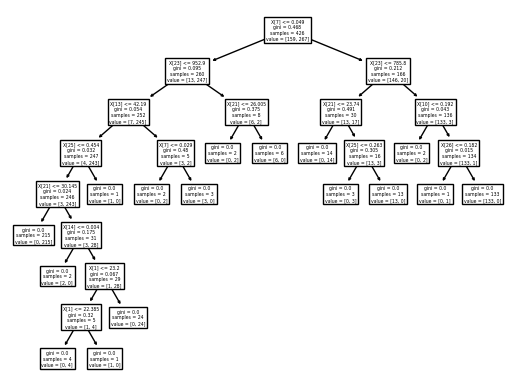

In [42]:
tree.plot_tree(clfs[0])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [69]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [73]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"zmienna {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [74]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.012 seconds


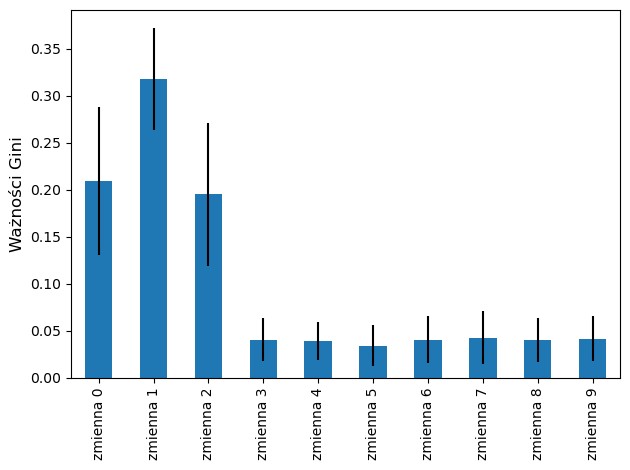

In [83]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_ylabel("Ważności Gini", fontsize = 12)
fig.tight_layout()

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

In [3]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [4]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(75, 3)

In [5]:
label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [6]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

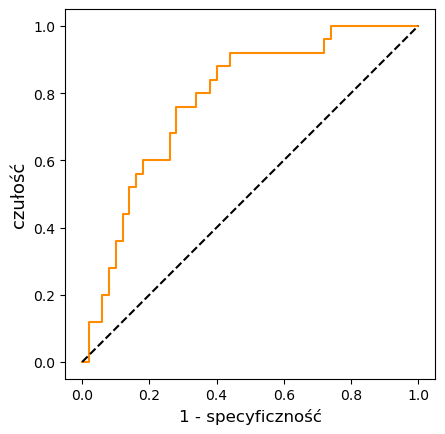

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--")
plt.axis("square")
plt.xlabel("1 - specyficzność", fontsize = 12)
plt.ylabel("czułość", fontsize = 13)
plt.legend('',frameon=False)
plt.show()